### Ecommerce Text Classification

***

This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

The dataset is in ".csv" format with two columns - the first column is the class name and the second one is the datapoint of that class. The data point is the product and description from the e-commerce website.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'ecommerceDataset.csv'

In [20]:
df = pd.read_csv('ecommerceDataset.csv', header = None)

In [21]:
df = df.sample(frac = 1)

In [22]:
df.reset_index(drop = True, inplace = True)

In [23]:
df = df[0:1000]

In [24]:
df.head()

,0,1
0,Clothing & Accessories,Hind Home Party and Lounge Wear Bow for Boys A...
1,Household,Philips 61013 Air 5-Watt LED Desklight (Black)...
2,Electronics,Electomania Computer Motherboard Power Cable S...
3,Electronics,Lenovo 65W Slim port AC Adapter (IN) Its lenov...
4,Household,Bright Electronics 3w LED spot Track Light(Foc...


### Check info

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### Check for missing values

In [26]:
df.isna().sum()

0    0
1    0
dtype: int64

### Drop missing rows

In [27]:
df.dropna(inplace = True)

### Print some of the text along with its Label

In [28]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Clothing & Accessories -- Hind Home Party and Lounge Wear Bow for Boys And Men Multicolor Pack Of 3 (Black,Red,Royal Blue) Buy this very classy Bow Tie proffered to you from Hind Home This pre-tied bow tie is very adjustable and easy to wear. Giving off vibes of elegance and class, this one is carefully picked to complement a very sleek and sexy suit of the same shade or one that contrasts. Handmade with love and tendered in the middle with extra caution to ensure finest quality for your product which is made of Satin.

Household -- Philips 61013 Air 5-Watt LED Desklight (Black) Save up to 80% energy compared to your standard bulb. It pays for itself and saves you money year after year. So reduce your energy bill and start saving now.

Electronics -- Electomania Computer Motherboard Power Cable Switch on/ff/Reset Button Replacement -10 Pieces Replace a broken power switch cable or design your own case mod with this on/off switch cable  Fits onto your motherboard's power switch and rese

### Create a function to preprocess the text

In [29]:
def preprocess(sentence):
    sentence = sentence.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", ' ', sentence).split()
    
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

In [30]:
df[1] = df[1].apply(preprocess)

### Print some of the texts after the applying the function

In [31]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Clothing & Accessories -- hind home party and lounge wear bow for boy and men multicolor pack of 3 black red royal blue buy this very classy bow tie proffered to you from hind home this pre tied bow tie is very adjustable and easy to wear giving off vibe of elegance and class this one is carefully picked to complement a very sleek and sexy suit of the same shade or one that contrast handmade with love and tendered in the middle with extra caution to ensure finest quality for your product which is made of satin

Household -- philip 61013 air 5 watt led desklight black save up to 80 energy compared to your standard bulb it pay for itself and save you money year after year so reduce your energy bill and start saving now

Electronics -- electomania computer motherboard power cable switch on ff reset button replacement 10 piece replace a broken power switch cable or design your own case mod with this on off switch cable fit onto your motherboard s power switch and reset key this item ha bee

### Check for imbalance in the dataset

<Axes: ylabel='count'>

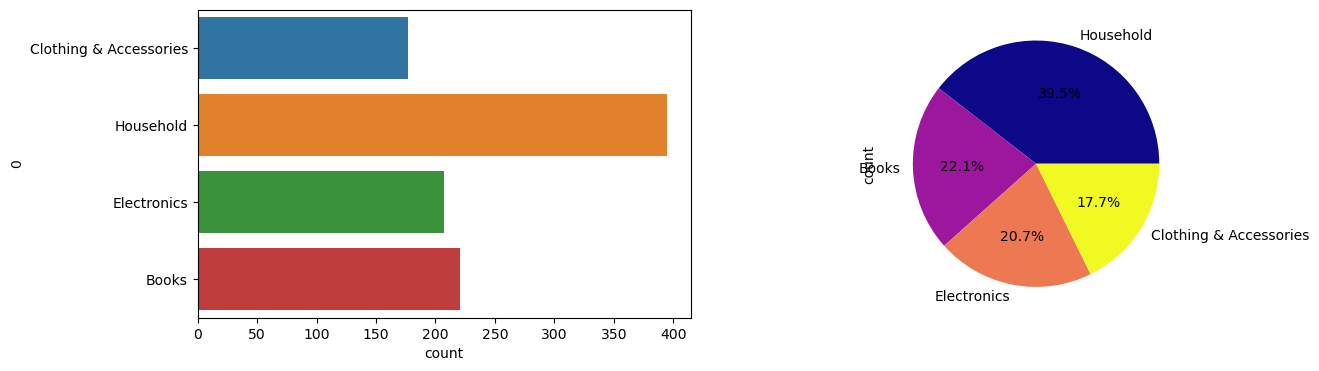

In [32]:
plt.figure(figsize= (14,4))
plt.subplot(1,2,1)
sns.countplot(y = df[0])
plt.subplot(1,2,2)
df[0].value_counts().plot.pie(autopct = '%1.1f%%', cmap = 'plasma')

### Split the dataset into Input & Target Variables

In [33]:
X = df[1]

In [34]:
y = df[0]

### Label Encode our Target Variables

In [35]:
y = y.map({'Household':0,'Books':1, 'Clothing & Accessories':2, 'Electronics':3})

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [36]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1

def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    padded_sequence = pad_sequences(encoded_docs, maxlen = 128)
    
    return padded_sequence

X = text_encoding(X)

### Split the dataset into Training & Testing set

In [37]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Create keras Sequential model with Bidirectional LSTM layers

In [39]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))

model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(4, activation = 'sigmoid'))

### Compile the model

In [40]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [41]:
model.fit(X_train, y_train, epochs = 10, validation_split=0.05)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 324ms/step - accuracy: 0.3788 - loss: 1.3463 - val_accuracy: 0.4500 - val_loss: 1.2526
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.5983 - loss: 0.9365 - val_accuracy: 0.5500 - val_loss: 1.2472
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.7698 - loss: 0.6147 - val_accuracy: 0.5750 - val_loss: 1.0104
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.8973 - loss: 0.3217 - val_accuracy: 0.6500 - val_loss: 0.9761
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.9434 - loss: 0.1942 - val_accuracy: 0.6250 - val_loss: 1.3126
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.9710 - loss: 0.1158 - val_accuracy: 0.6250 - val_loss: 1.0595
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.9938 - loss: 0.0375 - val_accuracy: 0.6500 - val_loss: 1.1498
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.9879 - loss: 0.0574 - val_accuracy: 0

### Make predictions with X_test

In [42]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step


### Fetch the index of the higher probable prediction

In [43]:
y_pred = [np.argmax(i) for i in y_pred]

### Evaluate the model

### Accuracy score

In [44]:
accuracy_score(y_test,y_pred)

0.85

### Confusion matrix

<Axes: >

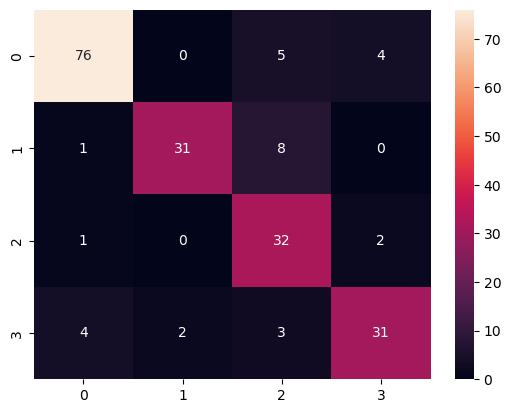

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Classification Report

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        85
           1       0.94      0.78      0.85        40
           2       0.67      0.91      0.77        35
           3       0.84      0.78      0.81        40

    accuracy                           0.85       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.87      0.85      0.85       200

